<a href="https://www.kaggle.com/code/aysearslancanakci/house-price-prediction?scriptVersionId=170363648" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <div style="padding: 30px; color:white; margin:10; font-size:150%; text-align:left; display:fill; border-radius:10px; background-color:#3b3745"><b><span style='color:#F1A424'>  |</span></b> <b>House Price</b></div>

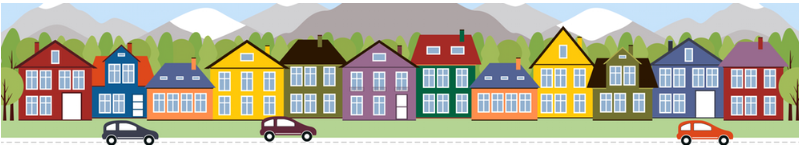

# <span style="color:#2D7680"> Table of Contents </span>

[<span style="color:#2D7680">   1. Examine the Dataset  </span>](#Exa)

[<span style="color:#2D7680">   2. Data Preparation  </span>](#Dat)

[<span style="color:#2D7680">   3. Feature Engineering  </span>](#Fea)

[<span style="color:#2D7680">   4. Modeling  </span>](#Mod)

#  <span style="color:#2D7680"> 1. Examine the Dataset </span> <a class="anchor" id="Exa"></a>

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.
With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

# <span style="color:#2D7680"> 2. Data Preparation </span> <a class="anchor" id="Dat"></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, cross_validate, RandomizedSearchCV, cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
pd.set_option('display.max_row', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width',500)

In [2]:
# Reading Train and Test datasets
train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

In [3]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
row_train = train.shape[0]
row_test = test.shape[0]
all_data = pd.concat((train, test)).reset_index(drop=True)

In [7]:
all_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [8]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [9]:
all_data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType       1766
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [10]:
# Analyzing variables 
def grab_col_names(dataframe, cat_th=10, car_th=20):
    
    # cat_cols, cat_but_car
    # 1- Categorical variables
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    
    # 2- Numeric but actually categorical (class)
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                        dataframe[col].dtypes != "O"]
    
    # 3 - Categorical but actually each cardinal, that is, unique
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                        dataframe[col].dtypes == "O"]
    
    # 4 - Collect the cat_cols and num_but_cat variables
    cat_cols = cat_cols + num_but_cat
    
    # 5- Subtract the cardinal variable from cat_cols
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car, num_but_cat

In [11]:
cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(all_data)

Observations: 2919
Variables: 81
cat_cols: 52
num_cols: 28
cat_but_car: 1
num_but_cat: 10


In [12]:
# Editing variables with type errors
num_cols.remove("MSSubClass")
num_cols.remove("MoSold")
cat_cols.append("MSSubClass")
cat_cols.append("MoSold")

In [13]:
#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)

#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)

In [14]:
# Observe the distribution of numerical and categorical variables in the data.
for col in cat_cols:
    print(pd.DataFrame({col: all_data[col].value_counts(),
                        "Ratio": 100 * all_data[col].value_counts() / len(all_data)}))
    print("######################")

          MSZoning      Ratio
MSZoning                     
RL            2265  77.595067
RM             460  15.758822
FV             139   4.761905
RH              26   0.890716
C (all)         25   0.856458
######################
        Street    Ratio
Street                 
Pave      2907  99.5889
Grvl        12   0.4111
######################
       Alley     Ratio
Alley                 
Grvl     120  4.110997
Pave      78  2.672148
######################
          LotShape      Ratio
LotShape                     
Reg           1859  63.686194
IR1            968  33.162042
IR2             76   2.603631
IR3             16   0.548133
######################
             LandContour      Ratio
LandContour                        
Lvl                 2622  89.825283
HLS                  120   4.110997
Bnk                  117   4.008222
Low                   60   2.055498
######################
           Utilities      Ratio
Utilities                      
AllPub          2916  99.89

In [15]:
all_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2919.0,1460.000000,842.787043,1.0,730.5,1460.0,2189.5,2919.0
LotFrontage,2433.0,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.0,7.0,10.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
MasVnrArea,2896.0,102.201312,179.334253,0.0,0.0,0.0,164.0,1600.0
BsmtFinSF1,2918.0,441.423235,455.610826,0.0,0.0,368.5,733.0,5644.0
BsmtFinSF2,2918.0,49.582248,169.205611,0.0,0.0,0.0,0.0,1526.0
BsmtUnfSF,2918.0,560.772104,439.543659,0.0,220.0,467.0,805.5,2336.0


In [16]:
# Performing target variable analysis with categorical variables

def target_with_cat(dataframe, target, cat_col):
    print(cat_col.upper())
    print(pd.DataFrame({"Target_Mean": dataframe.groupby(cat_col)[target].mean(),
                        "Count": dataframe[cat_col].value_counts(),
                        "Ratio": 100 * dataframe[cat_col].value_counts() / len(dataframe)}), end="\n\n\n")

In [17]:
for col in cat_cols:
    target_with_cat(all_data, "SalePrice", col)

MSZONING
            Target_Mean  Count      Ratio
MSZoning                                 
C (all)    74528.000000     25   0.856458
FV        214014.061538    139   4.761905
RH        131558.375000     26   0.890716
RL        191004.994787   2265  77.595067
RM        126316.830275    460  15.758822


STREET
          Target_Mean  Count    Ratio
Street                               
Grvl    130190.500000     12   0.4111
Pave    181130.538514   2907  99.5889


ALLEY
         Target_Mean  Count     Ratio
Alley                                
Grvl   122219.080000    120  4.110997
Pave   168000.585366     78  2.672148


LOTSHAPE
            Target_Mean  Count      Ratio
LotShape                                 
IR1       206101.665289    968  33.162042
IR2       239833.365854     76   2.603631
IR3       216036.500000     16   0.548133
Reg       164754.818378   1859  63.686194


LANDCONTOUR
               Target_Mean  Count      Ratio
LandContour                                 
Bnk      

In [18]:
# Check for any outliers

def outlier_thresholds(dataframe, col_name, q1=0.10, q3=0.90):
        quartile1 = dataframe[col_name].quantile(q1)
        quartile3 = dataframe[col_name].quantile(q3)
        interquantile_range = quartile3 - quartile1
        up_limit = quartile3 + 1.5 * interquantile_range
        low_limit = quartile1 - 1.5 * interquantile_range
        return low_limit, up_limit

In [19]:
def check_outlier(dataframe, col_name):
        low_limit, up_limit = outlier_thresholds(dataframe, col_name)
        if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
            return True
        else:
            return False

In [20]:
for col in num_cols:
    print(col, outlier_thresholds(all_data, col))

Id (-3208.8, 6128.800000000001)
LotFrontage (-35.0, 173.0)
LotArea (-9144.900000000001, 28367.9)
OverallQual (0.5, 12.5)
YearBuilt (1801.0, 2129.0)
YearRemodAdd (1865.6999999999996, 2090.500000000001)
MasVnrArea (-488.25, 813.75)
BsmtFinSF1 (-1585.3500000000008, 2642.2500000000014)
BsmtFinSF2 (-188.40000000000055, 314.0000000000009)
BsmtUnfSF (-1678.9000000000005, 2947.500000000001)
TotalBsmtSF (-921.0, 3135.0)
1stFlrSF (-650.5000000000002, 3070.3)
2ndFlrSF (-1387.5, 2312.5)
LowQualFinSF (0.0, 0.0)
GrLivArea (-920.3000000000004, 3997.3000000000006)
TotRmsAbvGrd (0.5, 12.5)
GarageYrBlt (1843.5, 2103.5)
GarageArea (-537.0, 1535.0)
WoodDeckSF (-385.5, 642.5)
OpenPorchSF (-196.8000000000004, 328.0000000000007)
EnclosedPorch (-168.0, 280.0)
3SsnPorch (0.0, 0.0)
ScreenPorch (0.0, 0.0)
PoolArea (0.0, 0.0)
MiscVal (0.0, 0.0)
SalePrice (-150812.5, 535287.5)


# <span style="color:#2D7680"> 3. Feature Engineering </span> <a class="anchor" id="Dat"></a>

In [21]:
# Examination of missing and outlier observations

def replace_with_thresholds(dataframe, col):
    low_limit, up_limit = outlier_thresholds(dataframe, col)
    dataframe.loc[(dataframe[col] < low_limit), col] = low_limit
    dataframe.loc[(dataframe[col] > up_limit), col] = up_limit

for col in num_cols:
    replace_with_thresholds(all_data, col)
    
# When we check for outliers with the y function, we observe the result.   
for col in num_cols:
    print(col, check_outlier(all_data, col))

Id False
LotFrontage False
LotArea False
OverallQual False
YearBuilt False
YearRemodAdd False
MasVnrArea False
BsmtFinSF1 False
BsmtFinSF2 False
BsmtUnfSF False
TotalBsmtSF False
1stFlrSF False
2ndFlrSF False
LowQualFinSF False
GrLivArea False
TotRmsAbvGrd False
GarageYrBlt False
GarageArea False
WoodDeckSF False
OpenPorchSF False
EnclosedPorch False
3SsnPorch False
ScreenPorch False
PoolArea False
MiscVal False
SalePrice False


/tmp/ipykernel_20/3357530151.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-3208.8' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[(dataframe[col] < low_limit), col] = low_limit
/tmp/ipykernel_20/3357530151.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-9144.900000000001' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[(dataframe[col] < low_limit), col] = low_limit
/tmp/ipykernel_20/3357530151.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[(dataframe[col] < low_limit), col] = low_limit
/tmp/ipykernel_20/335753

In [22]:
all_data["BsmtFinSF1"] = all_data["BsmtFinSF1"].fillna(all_data["BsmtFinSF1"].median())
all_data["BsmtFinSF2"] = all_data["BsmtFinSF2"].fillna(all_data["BsmtFinSF1"].median())
all_data["BsmtUnfSF"] = all_data["BsmtUnfSF"].fillna(all_data["BsmtFinSF1"].median())
all_data["TotalBsmtSF"] = all_data["TotalBsmtSF"].fillna(all_data["BsmtFinSF1"].median())
all_data["GarageYrBlt"] = all_data["GarageYrBlt"].fillna(all_data["BsmtFinSF1"].median())
all_data["GarageArea"] = all_data["GarageArea"].fillna(all_data["BsmtFinSF1"].median())
all_data["LotFrontage"] = all_data["LotFrontage"].fillna(all_data["BsmtFinSF1"].median())
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(all_data["BsmtFinSF1"].median())

In [23]:
all_data['GarageCars'] = all_data['GarageCars'].fillna(all_data['GarageCars'].mode()[0])

In [24]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")
all_data["GarageQual"] = all_data["GarageQual"].fillna("NA")
all_data["GarageCond"] = all_data["GarageCond"].fillna("NA")
all_data["PoolQC"] = all_data["PoolQC"].fillna("NA")
all_data["Fence"] = all_data["Fence"].fillna("NA")
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("NA")
all_data["Alley"] = all_data["Alley"].fillna("NA")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("NA")
all_data["GarageType"] = all_data["GarageType"].fillna("NA")
all_data["GarageFinish"] = all_data["GarageFinish"].fillna("NA")
all_data["BsmtQual"] = all_data["BsmtQual"].fillna("NA")
all_data["BsmtCond"] = all_data["BsmtCond"].fillna("NA")
all_data["BsmtExposure"] = all_data["BsmtExposure"].fillna("NA")
all_data["BsmtFinType1"] = all_data["BsmtFinType1"].fillna("NA")
all_data["BsmtFinType2"] = all_data["BsmtFinType2"].fillna("NA")

In [25]:
all_data['Utilities'] = all_data['Utilities'].fillna(all_data['Utilities'].mode()[0])
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data['BsmtFullBath'] = all_data['BsmtFullBath'].fillna(all_data['BsmtFullBath'].mode()[0])
all_data['BsmtHalfBath'] = all_data['BsmtHalfBath'].fillna(all_data['BsmtHalfBath'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

In [26]:
all_data["Exterior1st"] = all_data["Exterior1st"].fillna("other")
all_data["Exterior2nd"] = all_data["Exterior2nd"].fillna("other")
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["SaleType"] = all_data["SaleType"].fillna("Oth")
all_data["Electrical"] = all_data["Electrical"].fillna("Mix")

In [27]:
# Rare Encoder implementation

def rare_encoder(dataframe, rare_perc):
    temp_df = dataframe.copy()

    rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes == 'O'
                    and (temp_df[col].value_counts() / len(temp_df) < rare_perc).any(axis=None)]

    for var in rare_columns:
        tmp = temp_df[var].value_counts() / len(temp_df)
        rare_labels = tmp[tmp < rare_perc].index
        temp_df[var] = np.where(temp_df[var].isin(rare_labels), 'Rare', temp_df[var])

    return temp_df

In [28]:
all_data=rare_encoder(all_data, 0.01)
all_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1.0,60,RL,65.0,8450.0,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5,2003,2003.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856.0,854.0,0,1710.0,1.0,0.0,2,1,3,1,Gd,8.0,Typ,0,NA,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0.0,61.0,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,208500.0
1,2.0,20,RL,80.0,9600.0,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Rare,Feedr,Norm,1Fam,1Story,6.0,8,1976,1976.0,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262.0,0.0,0,1262.0,0.0,1.0,2,0,3,1,TA,6.0,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298.0,0.0,0,0,0,0,NA,NA,NA,0,5,2007,WD,Normal,181500.0
2,3.0,60,RL,68.0,11250.0,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5,2001,2002.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920.0,866.0,0,1786.0,1.0,0.0,2,1,3,1,Gd,6.0,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0.0,42.0,0,0,0,0,NA,NA,NA,0,9,2008,WD,Normal,223500.0
3,4.0,70,RL,60.0,9550.0,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7.0,5,1915,1970.0,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961.0,756.0,0,1717.0,1.0,0.0,1,0,3,1,Gd,7.0,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0.0,35.0,272,0,0,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000.0
4,5.0,60,RL,84.0,14260.0,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8.0,5,2000,2000.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145.0,1053.0,0,2198.0,1.0,0.0,2,1,4,1,Gd,9.0,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192.0,84.0,0,0,0,0,NA,NA,NA,0,12,2008,WD,Normal,250000.0


In [29]:
# Creating new variables

all_data['Total_Bathrooms'] = (all_data['FullBath'] + all_data['HalfBath'] + all_data['BsmtFullBath'] + all_data['BsmtHalfBath'])

all_data['YrBltAndRemod'] = all_data['YearBuilt'] + all_data['YearRemodAdd']

all_data['Totallot'] = all_data['LotFrontage'] + all_data['LotArea']

In [30]:
# Encoding 

def label_encoder(dataframe, binary_cols):
    dataframe[binary_cols] = LabelEncoder().fit_transform(dataframe[binary_cols])
    return dataframe

binary_cols = [col for col in all_data.columns if all_data[col].dtype == "O" and all_data[col].nunique() == 2]
for col in binary_cols:
    all_data = label_encoder(all_data, col)
    

# OneHot encoder

def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

cols = [col for col in all_data.columns if 22 >= all_data[col].nunique() > 2]

df2 = one_hot_encoder(all_data, cols)

df2.head()

,Id,LotFrontage,LotArea,Street,Utilities,Condition2,YearBuilt,YearRemodAdd,RoofMatl,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,SalePrice,YrBltAndRemod,Totallot,MSSubClass_160,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_Rare,MSZoning_RL,MSZoning_RM,MSZoning_Rare,Alley_NA,Alley_Pave,LotShape_IR2,LotShape_Rare,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,LotConfig_Rare,LandSlope_Mod,LandSlope_Rare,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Rare,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Condition1_Feedr,Condition1_Norm,Condition1_PosN,Condition1_RRAn,Condition1_Rare,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Rare,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2.0,OverallQual_3.0,OverallQual_4.0,OverallQual_5.0,OverallQual_6.0,OverallQual_7.0,OverallQual_8.0,OverallQual_9.0,OverallQual_10.0,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,OverallCond_Rare,RoofStyle_Hip,RoofStyle_Rare,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Rare,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Rare,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_None,MasVnrType_Rare,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Gd,ExterCond_Rare,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Rare,Foundation_Slab,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Rare,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Rare,HeatingQC_TA,Electrical_FuseF,Electrical_Rare,Electrical_SBrkr,BsmtFullBath_1.0,BsmtFullBath_2.0,BsmtFullBath_3.0,BsmtHalfBath_1.0,BsmtHalfBath_2.0,FullBath_1,FullBath_2,FullBath_3,FullBath_4,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_3.0,TotRmsAbvGrd_4.0,TotRmsAbvGrd_5.0,TotRmsAbvGrd_6.0,TotRmsAbvGrd_7.0,TotRmsAbvGrd_8.0,TotRmsAbvGrd_9.0,TotRmsAbvGrd_10.0,TotRmsAbvGrd_11.0,TotRmsAbvGrd_12.0,TotRmsAbvGrd_12.5,Functional_Min2,Functional_Mod,Functional_Rare,Functional_Typ,Fireplaces_1,Fireplaces_2,Fireplaces_3,Fireplaces_4,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Basment,GarageType_BuiltIn,GarageType_Detchd,GarageType_NA,GarageType_Rare,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1.0,GarageCars_2.0,GarageCars_3.0,GarageCars_4.0,GarageCars_5.0,GarageQual_NA,GarageQual_Rare,GarageQual_TA,GarageCond_NA,GarageCond_Rare,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_NA,Fence_Rare,MiscFeature_Rare,MiscFeature_Shed,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2

In [31]:
cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df2)

Observations: 2919
Variables: 281
cat_cols: 260
num_cols: 21
cat_but_car: 0
num_but_cat: 260


In [32]:
num_cols.remove("Id")
num_cols.remove("SalePrice")

In [33]:
from sklearn.preprocessing import LabelEncoder, RobustScaler
rs = RobustScaler()
df2[num_cols] = rs.fit_transform(df2[num_cols])

In [34]:
df2.head()

,Id,LotFrontage,LotArea,Street,Utilities,Condition2,YearBuilt,YearRemodAdd,RoofMatl,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,SalePrice,YrBltAndRemod,Totallot,MSSubClass_160,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_Rare,MSZoning_RL,MSZoning_RM,MSZoning_Rare,Alley_NA,Alley_Pave,LotShape_IR2,LotShape_Rare,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,LotConfig_Rare,LandSlope_Mod,LandSlope_Rare,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Rare,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Condition1_Feedr,Condition1_Norm,Condition1_PosN,Condition1_RRAn,Condition1_Rare,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Rare,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2.0,OverallQual_3.0,OverallQual_4.0,OverallQual_5.0,OverallQual_6.0,OverallQual_7.0,OverallQual_8.0,OverallQual_9.0,OverallQual_10.0,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,OverallCond_Rare,RoofStyle_Hip,RoofStyle_Rare,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Rare,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Rare,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_None,MasVnrType_Rare,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Gd,ExterCond_Rare,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Rare,Foundation_Slab,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Rare,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Rare,HeatingQC_TA,Electrical_FuseF,Electrical_Rare,Electrical_SBrkr,BsmtFullBath_1.0,BsmtFullBath_2.0,BsmtFullBath_3.0,BsmtHalfBath_1.0,BsmtHalfBath_2.0,FullBath_1,FullBath_2,FullBath_3,FullBath_4,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_3.0,TotRmsAbvGrd_4.0,TotRmsAbvGrd_5.0,TotRmsAbvGrd_6.0,TotRmsAbvGrd_7.0,TotRmsAbvGrd_8.0,TotRmsAbvGrd_9.0,TotRmsAbvGrd_10.0,TotRmsAbvGrd_11.0,TotRmsAbvGrd_12.0,TotRmsAbvGrd_12.5,Functional_Min2,Functional_Mod,Functional_Rare,Functional_Typ,Fireplaces_1,Fireplaces_2,Fireplaces_3,Fireplaces_4,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Basment,GarageType_BuiltIn,GarageType_Detchd,GarageType_NA,GarageType_Rare,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1.0,GarageCars_2.0,GarageCars_3.0,GarageCars_4.0,GarageCars_5.0,GarageQual_NA,GarageQual_Rare,GarageQual_TA,GarageCond_NA,GarageCond_Rare,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_NA,Fence_Rare,MiscFeature_Rare,MiscFeature_Shed,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2

# <span style="color:#2D7680"> 4. Modeling </span> <a class="anchor" id="Dat"></a>

In [35]:
# Separating Train and Test data

train = df2[:row_train]
test_1 = df2[row_train:]

In [36]:
# Build a model with train data

X = train.drop(['SalePrice','Id'], axis=1)
y = train['SalePrice']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [38]:
y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)
y_train = np.log(y_train)
y_test = np.log(y_test)

In [39]:
#CatBoost
cb_model = CatBoostRegressor(loss_function='RMSE', logging_level='Silent')
cb_model.fit(X_train, y_train)
preds = cb_model.predict(X_test)

In [40]:
print('MAE:', metrics.mean_absolute_error(y_test, preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))

MAE: 0.08481823257258944
MSE: 0.01723765512262422
RMSE: 0.13129225080949836


In [41]:
cb_r2_score=r2_score(y_test, preds)
cb_r2_score

0.893643437976127

In [42]:
# CatBoost Regressor

cb = CatBoostRegressor(loss_function='RMSE', logging_level='Silent')
cb_params = {"iterations": [300, 350],
                   "learning_rate": [0.1, 0.2],
                   "depth": [3, 5]}
cb_random = GridSearchCV(estimator=cb,param_grid=cb_params, n_jobs=-1)

cb_random.fit(X_train, y_train)

GridSearchCV(estimator=<catboost.core.CatBoostRegressor object at 0x7a653424f610>,
             n_jobs=-1,
             param_grid={'depth': [3, 5], 'iterations': [300, 350],
                         'learning_rate': [0.1, 0.2]})

In [43]:
print(cb_random.best_params_)

final_model = cb.set_params(**cb_random.best_params_, random_state=17).fit(X_train, y_train)

{'depth': 5, 'iterations': 350, 'learning_rate': 0.1}


In [44]:
cat_pred = final_model.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, cat_pred))
print('MSE:', metrics.mean_squared_error(y_test, cat_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, cat_pred)))
print('r2_score:', r2_score(y_test, cat_pred))

MAE: 0.084753797491448
MSE: 0.017054049367425744
RMSE: 0.13059115348072298
r2_score: 0.8947762879346505


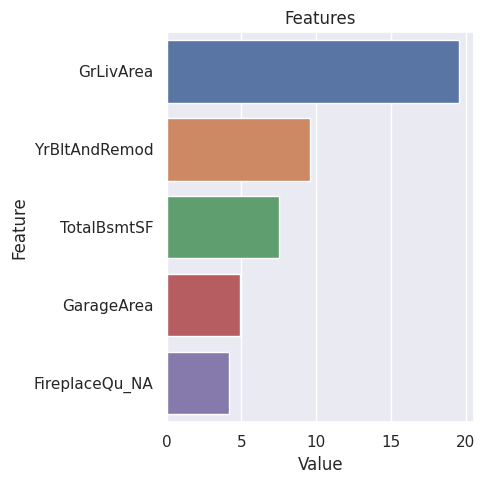

In [45]:
# Variable severity

def plot_importance(model, features, num=5, save=False):

    feature_imp = pd.DataFrame({"Value": model.feature_importances_, "Feature": features.columns})
    plt.figure(figsize=(5, 5))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
    plt.title("Features")
    plt.tight_layout()
    plt.show()

plot_importance(final_model, X)

In [46]:
Sub = test_1.drop(["Id",'SalePrice'], axis=1)
Sub.head()

,LotFrontage,LotArea,Street,Utilities,Condition2,YearBuilt,YearRemodAdd,RoofMatl,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,YrBltAndRemod,Totallot,MSSubClass_160,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_Rare,MSZoning_RL,MSZoning_RM,MSZoning_Rare,Alley_NA,Alley_Pave,LotShape_IR2,LotShape_Rare,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,LotConfig_Rare,LandSlope_Mod,LandSlope_Rare,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Rare,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Condition1_Feedr,Condition1_Norm,Condition1_PosN,Condition1_RRAn,Condition1_Rare,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Rare,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2.0,OverallQual_3.0,OverallQual_4.0,OverallQual_5.0,OverallQual_6.0,OverallQual_7.0,OverallQual_8.0,OverallQual_9.0,OverallQual_10.0,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,OverallCond_Rare,RoofStyle_Hip,RoofStyle_Rare,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Rare,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Rare,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_None,MasVnrType_Rare,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Gd,ExterCond_Rare,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Rare,Foundation_Slab,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Rare,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Rare,HeatingQC_TA,Electrical_FuseF,Electrical_Rare,Electrical_SBrkr,BsmtFullBath_1.0,BsmtFullBath_2.0,BsmtFullBath_3.0,BsmtHalfBath_1.0,BsmtHalfBath_2.0,FullBath_1,FullBath_2,FullBath_3,FullBath_4,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_3.0,TotRmsAbvGrd_4.0,TotRmsAbvGrd_5.0,TotRmsAbvGrd_6.0,TotRmsAbvGrd_7.0,TotRmsAbvGrd_8.0,TotRmsAbvGrd_9.0,TotRmsAbvGrd_10.0,TotRmsAbvGrd_11.0,TotRmsAbvGrd_12.0,TotRmsAbvGrd_12.5,Functional_Min2,Functional_Mod,Functional_Rare,Functional_Typ,Fireplaces_1,Fireplaces_2,Fireplaces_3,Fireplaces_4,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Basment,GarageType_BuiltIn,GarageType_Detchd,GarageType_NA,GarageType_Rare,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1.0,GarageCars_2.0,GarageCars_3.0,GarageCars_4.0,GarageCars_5.0,GarageQual_NA,GarageQual_Rare,GarageQual_TA,GarageCond_NA,GarageCond_Rare,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_NA,Fence_Rare,MiscFeature_Rare,MiscFeature_Shed,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_

In [47]:
Sub_pred=cb.predict(Sub)
Sub_pred= Sub_pred.reshape(-1,1)
Sub_pred =np.exp(Sub_pred)

In [48]:
Submissions= pd.DataFrame()
Submissions["Id"] = test["Id"]
Submissions['SalePrice'] = Sub_pred
Submissions.head()

,Id,SalePrice
0,1461,128613.423471
1,1462,161875.119896
2,1463,201241.926465
3,1464,204332.963564
4,1465,182906.548866


In [49]:
Submissions.to_csv('housepricepred.csv',index=False)